In [1]:
import numpy as np

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("lung_disease_data.csv")

In [4]:
df.head(5)

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0,No
2,80.0,Male,Yes,1.95,COPD,NaN,4.0,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0,No
4,43.0,Male,Yes,4.60,COPD,Surgery,NaN,Yes


In [5]:
df.shape

(5200, 8)

In [6]:
df.sample(5)

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
4360,88.0,Female,No,5.41,COPD,Therapy,2.0,NaN
2603,38.0,Female,No,NaN,Asthma,Medication,NaN,No
3716,22.0,Male,Yes,2.35,COPD,Medication,5.0,No
5180,61.0,Female,Yes,4.02,Pneumonia,Medication,7.0,Yes
4877,60.0,Male,No,1.04,Pneumonia,Therapy,9.0,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4900 non-null   float64
 1   Gender           4900 non-null   object 
 2   Smoking Status   4900 non-null   object 
 3   Lung Capacity    4900 non-null   float64
 4   Disease Type     4900 non-null   object 
 5   Treatment Type   4900 non-null   object 
 6   Hospital Visits  4900 non-null   float64
 7   Recovered        4900 non-null   object 
dtypes: float64(3), object(5)
memory usage: 325.1+ KB


In [8]:
df.isna().sum()

Age                300
Gender             300
Smoking Status     300
Lung Capacity      300
Disease Type       300
Treatment Type     300
Hospital Visits    300
Recovered          300
dtype: int64

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5195     True
5196    False
5197     True
5198     True
5199     True
Length: 5200, dtype: bool

In [10]:
df.nunique()

Age                 70
Gender               2
Smoking Status       2
Lung Capacity      501
Disease Type         5
Treatment Type       3
Hospital Visits     14
Recovered            2
dtype: int64

In [11]:
df["Treatment Type"].unique()

array(['Therapy', 'Surgery', nan, 'Medication'], dtype=object)

<Axes: >

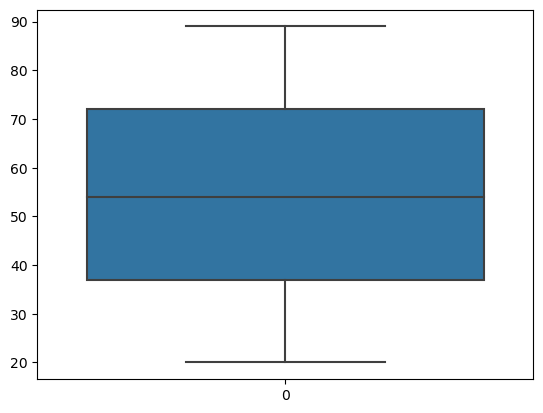

In [12]:
sns.boxplot(df["Age"])

In [13]:
df.head(1)

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes


<Axes: >

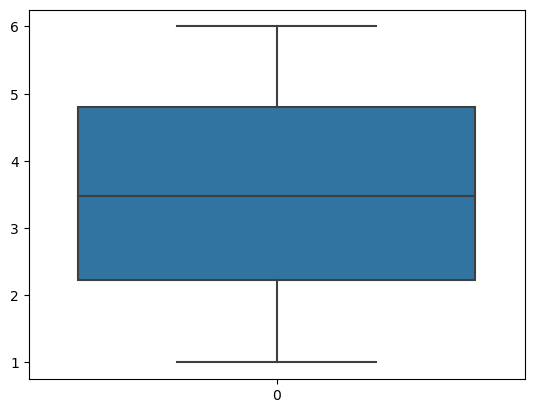

In [14]:
sns.boxplot(df["Lung Capacity"])

<Axes: >

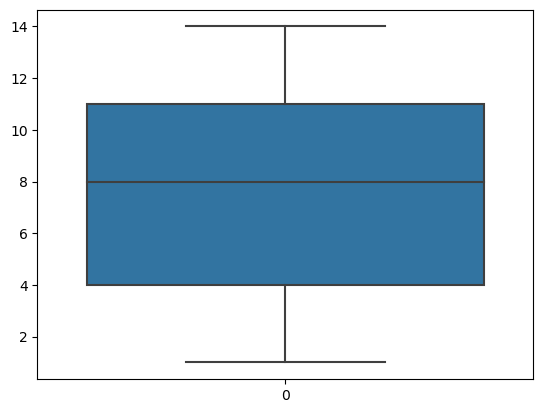

In [15]:
sns.boxplot(df["Hospital Visits"])

In [16]:
df1=df.copy()

In [17]:
df1.head(1)

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes


In [18]:
df1.isna().sum()

Age                300
Gender             300
Smoking Status     300
Lung Capacity      300
Disease Type       300
Treatment Type     300
Hospital Visits    300
Recovered          300
dtype: int64

In [19]:
mean_value= df1["Age"].mean()
df1["Age"].fillna(mean_value,inplace=True)
mean_value= df1["Lung Capacity"].mean()
df1["Lung Capacity"].fillna(mean_value,inplace=True)
mean_value= df1["Hospital Visits"].mean()
df1["Hospital Visits"].fillna(mean_value,inplace=True)

In [20]:
df1.isna().sum()

Age                  0
Gender             300
Smoking Status     300
Lung Capacity        0
Disease Type       300
Treatment Type     300
Hospital Visits      0
Recovered          300
dtype: int64

In [21]:
df1["Gender"].fillna(df1["Gender"].value_counts().index[0],inplace=True)
df1["Disease Type"].fillna(df1["Disease Type"].value_counts().index[0],inplace=True)
df1["Smoking Status"].fillna(df1["Smoking Status"].value_counts().index[0],inplace=True)
df1["Recovered"].fillna(df1["Recovered"].value_counts().index[0],inplace=True)

In [22]:
df1.dropna(inplace=True)

In [23]:
df1.shape

(4900, 8)

C:\Users\ajay singh\AppData\Local\Temp\ipykernel_22620\2062854280.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["Age"])
C:\Users\ajay singh\AppData\Local\Temp\ipykernel_22620\2062854280.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["Lung Capacity"])


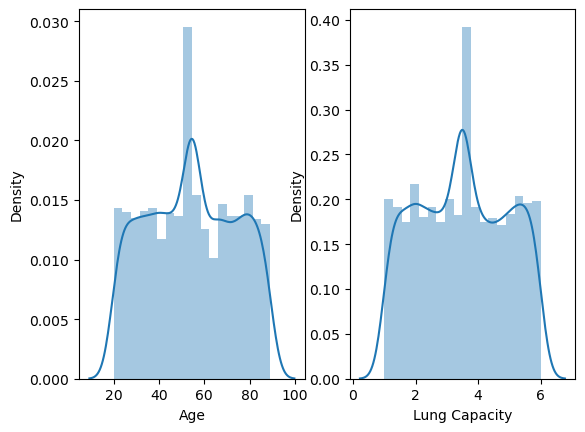

In [24]:
plt.subplot(1,2,1)
sns.distplot(df1["Age"])
plt.subplot(1,2,2)
sns.distplot(df1["Lung Capacity"])
plt.show()

In [25]:
mean=df1["Age"].mean()
std=df1["Age"].std()
print(mean,",",std)


54.27651895043732 , 19.515309680927555


In [26]:
df1["z-score"]=(df1["Age"]-mean)/std

In [27]:
df1.sample(5)

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered,z-score
2191,38.0,Female,No,1.74,Asthma,Surgery,10.0,Yes,-0.834038
2891,73.0,Male,No,5.99,Pneumonia,Medication,13.0,Yes,0.959425
4947,54.0,Male,No,5.85,COPD,Surgery,5.0,No,-0.014169
1765,79.0,Female,Yes,5.08,Asthma,Surgery,11.0,Yes,1.266876
1908,42.0,Female,No,2.30,Lung Cancer,Therapy,9.0,No,-0.629071


In [28]:
df1.duplicated().sum()
df1.drop_duplicates(inplace=True)

In [33]:
bins=(10,20,30,40,50,60,70,80,100)
df1["Age"].value_counts(bins=bins)

Age
(50.0, 60.0]     948
(30.0, 40.0]     675
(60.0, 70.0]     643
(70.0, 80.0]     640
(40.0, 50.0]     637
(20.0, 30.0]     630
(80.0, 100.0]    561
(9.999, 20.0]     62
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

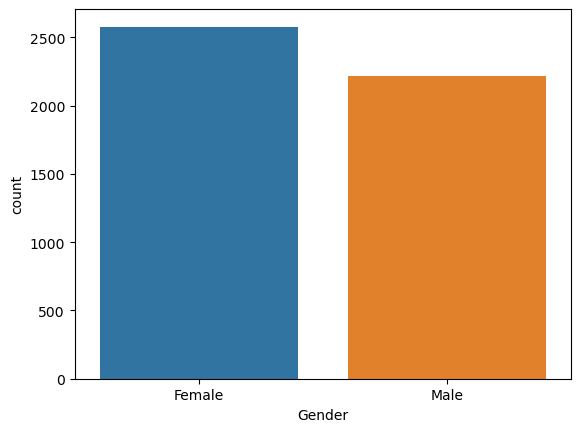

In [34]:
sns.countplot(data=df1,x="Gender")

<Axes: xlabel='Treatment Type', ylabel='count'>

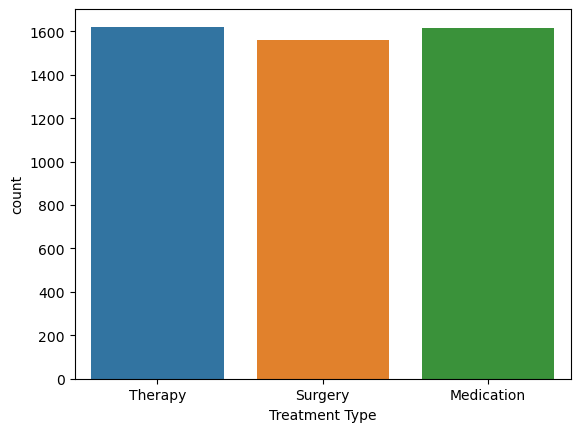

In [35]:
sns.countplot(data=df1,x="Treatment Type")

<Axes: xlabel='Disease Type', ylabel='count'>

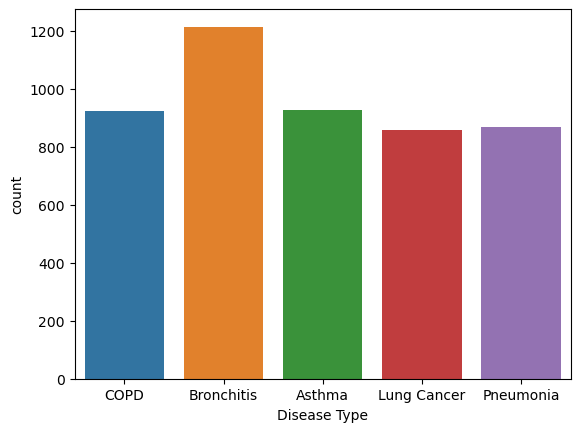

In [36]:
sns.countplot(data=df1,x="Disease Type")

<Axes: xlabel='Disease Type', ylabel='count'>

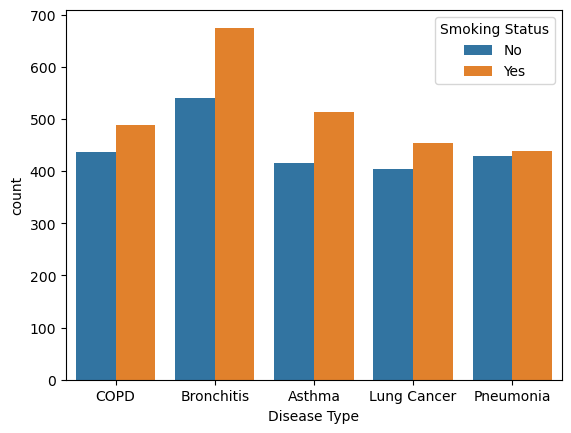

In [38]:
sns.countplot(data=df1,x="Disease Type",hue="Smoking Status")

<Axes: xlabel='Disease Type', ylabel='count'>

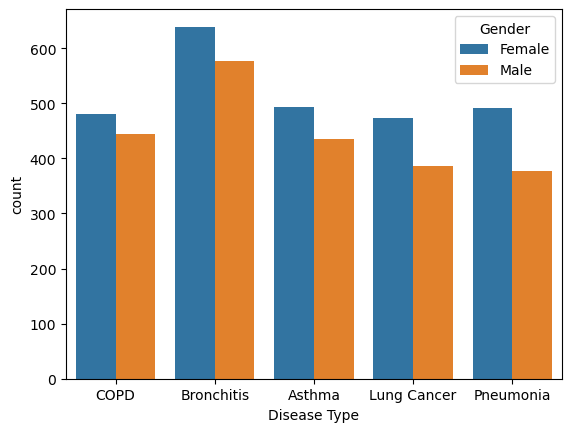

In [39]:
sns.countplot(data=df1,x="Disease Type",hue="Gender")

<Axes: xlabel='Disease Type'>

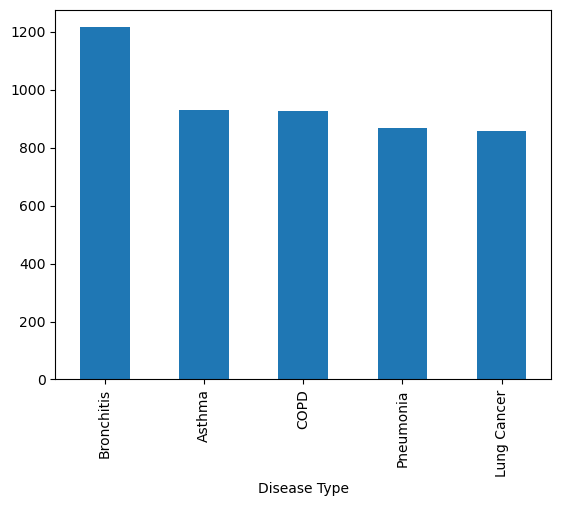

In [40]:
df1["Disease Type"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

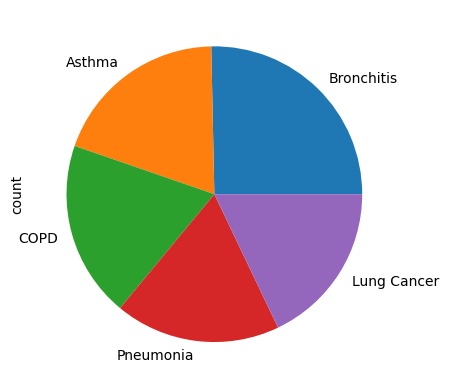

In [41]:
df1["Disease Type"].value_counts().plot(kind="pie")

<Axes: xlabel='Age', ylabel='Count'>

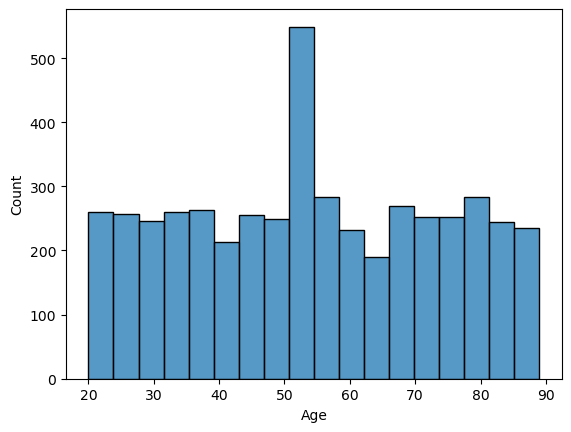

In [43]:
sns.histplot(data=df1,x="Age")

C:\Users\ajay singh\AppData\Local\Temp\ipykernel_22620\2503459887.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["Age"])


<Axes: xlabel='Age', ylabel='Density'>

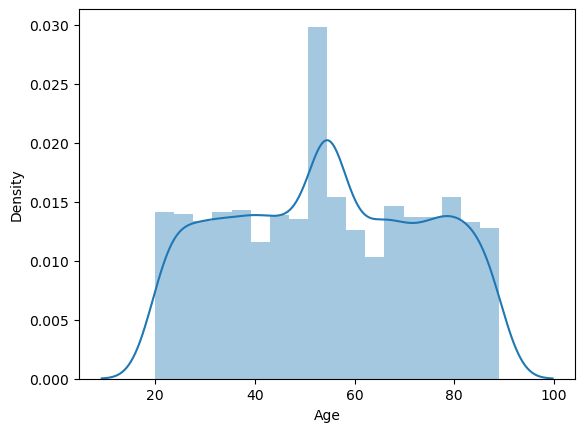

In [44]:
sns.distplot(df1["Age"])

<Axes: >

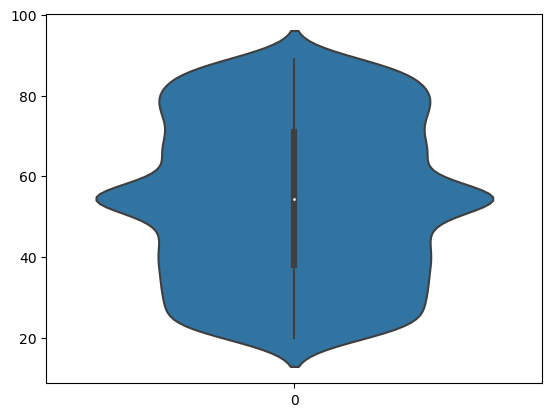

In [45]:
sns.violinplot(df1["Age"])

<Axes: xlabel='Smoking Status', ylabel='Age'>

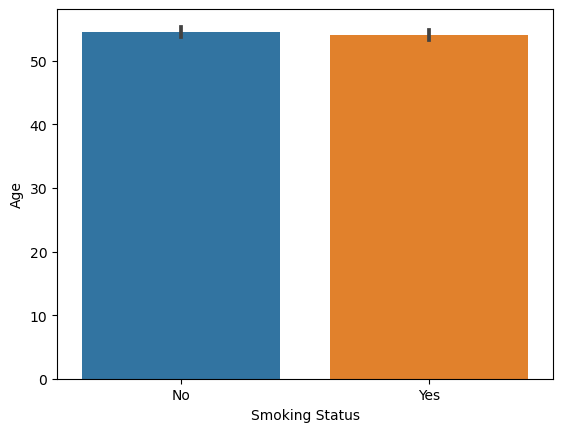

In [47]:
sns.barplot(data=df1,x="Smoking Status",y="Age")

<Axes: xlabel='Smoking Status', ylabel='Lung Capacity'>

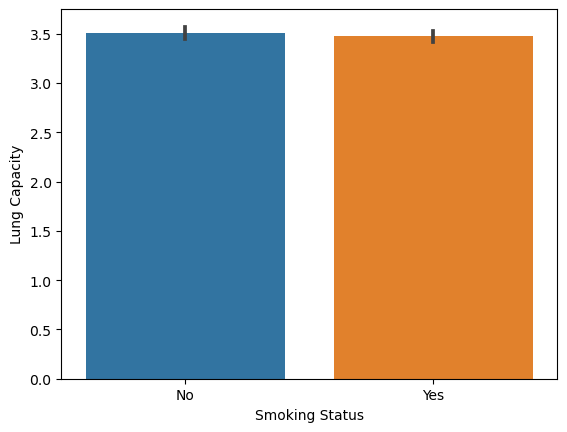

In [48]:
sns.barplot(data=df1,x="Smoking Status",y="Lung Capacity")

<Axes: xlabel='Smoking Status', ylabel='Age'>

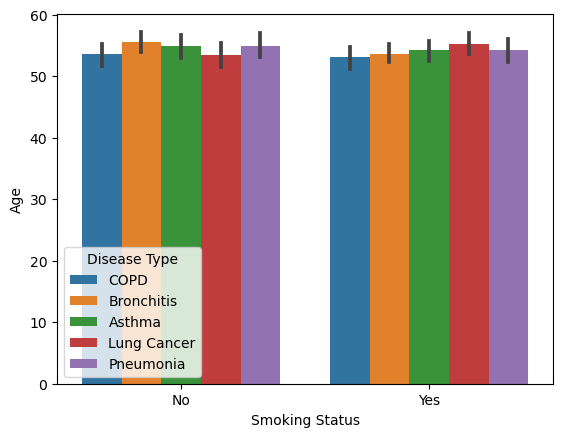

In [49]:
sns.barplot(data=df1,x="Smoking Status",y="Age",hue="Disease Type")

<Axes: xlabel='Smoking Status', ylabel='Age'>

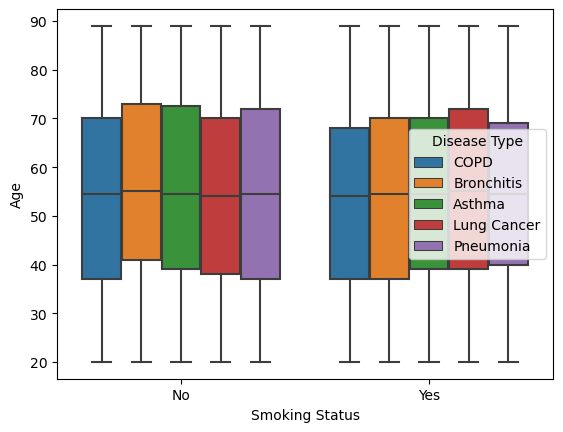

In [50]:
sns.boxplot(data=df1,x="Smoking Status",y="Age",hue="Disease Type")

<Axes: xlabel='Smoking Status', ylabel='Age'>

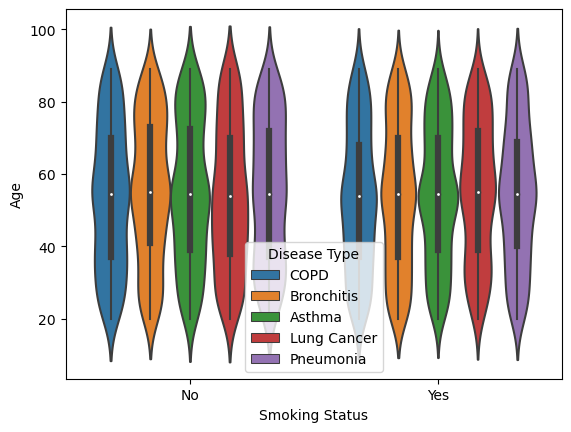

In [52]:
sns.violinplot(data=df1,x="Smoking Status",y="Age",hue="Disease Type")

In [53]:
data=df1.copy()

In [54]:
x=pd.crosstab(data["Smoking Status"],data["Disease Type"])
x

Disease Type,Asthma,Bronchitis,COPD,Lung Cancer,Pneumonia
Smoking Status,,,,,
No,415,540,436,405,429
Yes,514,675,489,454,439


<Axes: xlabel='Disease Type', ylabel='Smoking Status'>

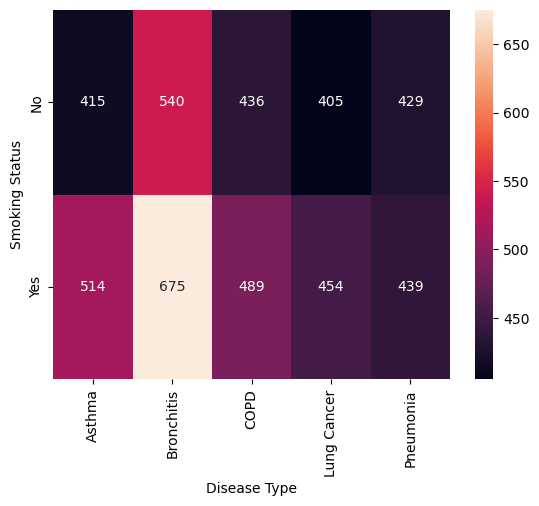

In [59]:
sns.heatmap(x,annot=True,fmt='1g')

<Axes: xlabel='Disease Type', ylabel='Age'>

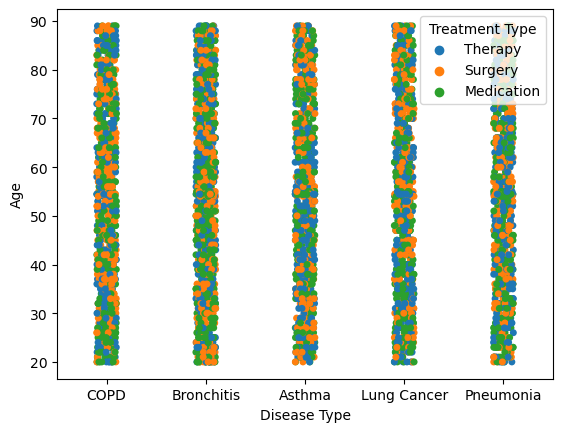

In [60]:
sns.stripplot(x="Disease Type",y="Age",hue="Treatment Type",data=data)

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


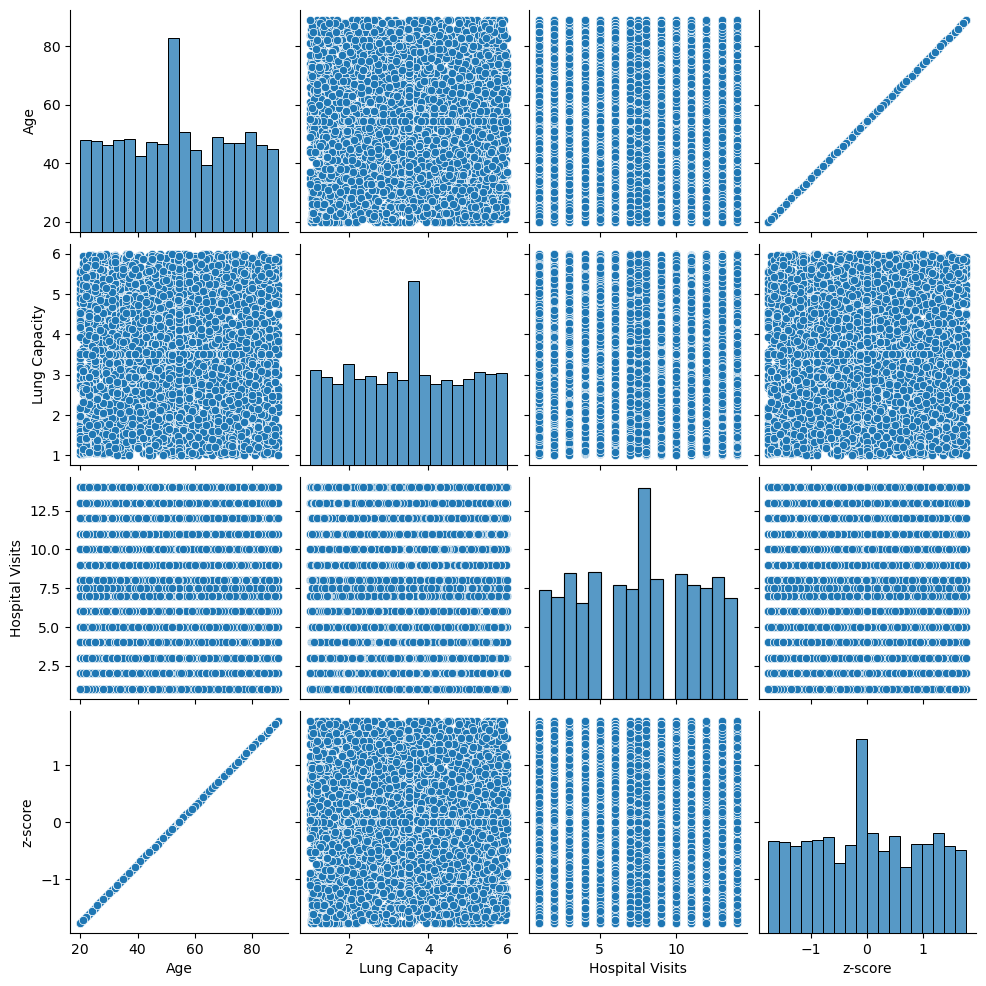

In [61]:
sns.pairplot(data)

<Axes: xlabel='Age', ylabel='Lung Capacity'>

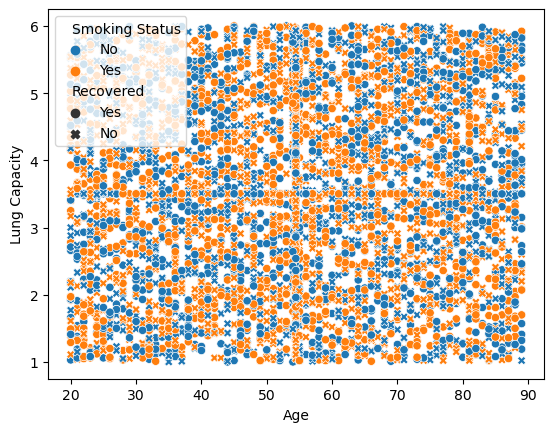

In [64]:
sns.scatterplot(x="Age",y="Lung Capacity",hue="Smoking Status",style="Recovered",data=data)

In [63]:
data.head(1)

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered,z-score
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes,0.856942
